# Free particle

### Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("science")

### Free Schrödinger equation

$$
-\frac{\hbar}{2m}\nabla^2 \psi(r, t) = i \hbar \frac{\partial}{\partial t} \psi(r, t)
$$

where

- $\hbar$: reduced planck constant
- $m$: mass
- $r$: position
- $t$: time
- $\psi$: wave function

**Solution**

$$
\psi(r,t) = A \exp^{i (k \bullet r - wt)} = A \exp^{i(p \bullet r - Et) / \hbar}
$$

where

- $p$: momentum
- $k$: wave vector
- $w$: angular frequency (rad/sec)
- $E$: energy

### Propagation of quantum free particle in 1d

**Plane wave**

$$
\psi(x,t) = A * \exp^{i(kx - wt)}
$$

where

- A: amplitude
- k: wave vector
- x: position
- w: angular frequency
- t: time

In [2]:
def plane_wave(A, k, x, w, t):
    return A * np.exp(np.csingle('j') * (k * x - w * t))

In [3]:
# Position x
x = 5
# Amplitude A
A = 1.
# Wave vector k
k = 2 * np.pi * 2
# angular frequency
w = 0.5
# Time t
ti = np.linspace(0, 30, 1000)

In [4]:
psi = [plane_wave(A, k, x, w, _t) for _t in ti]

In [5]:
real = [np.real(_psi) for _psi in psi]
imag = [np.imag(_psi) for _psi in psi]

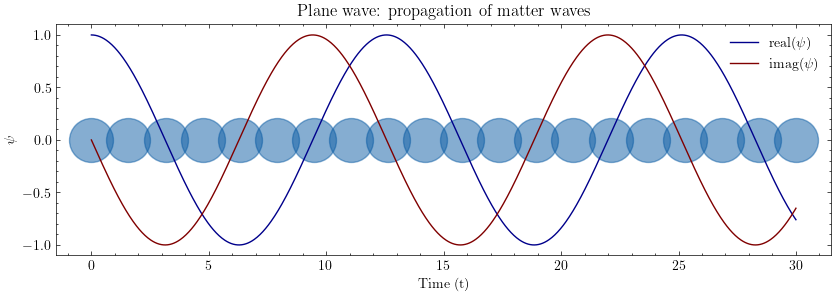

In [6]:
fig, ax = plt.subplots(figsize = (10, 3))
ax.plot(ti, real, color = "darkblue", label = r"real($\psi$)")
ax.plot(ti, imag, color = "maroon", label = r"imag($\psi$)")
tii = np.linspace(0, 30, 20)
ax.scatter(tii, np.zeros(20), s = 1000., alpha = 0.5)
ax.set_xlabel("Time (t)")
ax.set_ylabel(r"$\psi$")
plt.legend()
plt.title("Plane wave: propagation of matter waves")
plt.show()

**Wave packet**

$$
\psi(x,t) = \sum_n A_n \exp^{i(k_n x - w_n t)} 
$$

In [7]:
def wave_packet(An, kn, x, wn, t, n):
    s = An[0] * np.exp(np.csingle('j') * (kn * x - wn * t))
    for i in range(n):
        s += An[i] * np.exp(np.csingle('j') * (kn[i] * x - wn[i] * t))
    return s.sum()

In [8]:
n = 3
# Amplitude A
An = np.array([2, 4, 2])
# Wave vector k
kn = 2 * np.pi * np.array([2, 2, 2])
# angular frequency
wn = np.array([0.5, 1., 0.5])
# Position x
p = 30
xi = np.linspace(0, 30, p)
# Time t
q = 100
ti = np.linspace(0, 100, q)

In [9]:
psi = np.repeat(np.csingle(0), p * q)
psi = psi.reshape((p, q))

In [10]:
# position, time
for i in range(p):
    for j in range(q):
        psi[i, j] = wave_packet(An, kn, xi[i], wn, ti[j], n)

In [11]:
psi.shape

(30, 100)

**Wave packet for a given time $t \in [0, q]$**

In [12]:
psi_t = psi[:, 1]
# Real and imag part
real_t = [np.real(_psi) for _psi in psi_t]
imag_t = [np.imag(_psi) for _psi in psi_t]
# Psi abs (same for each position t in [0, p])
psi_abs = np.absolute(psi[0, :])

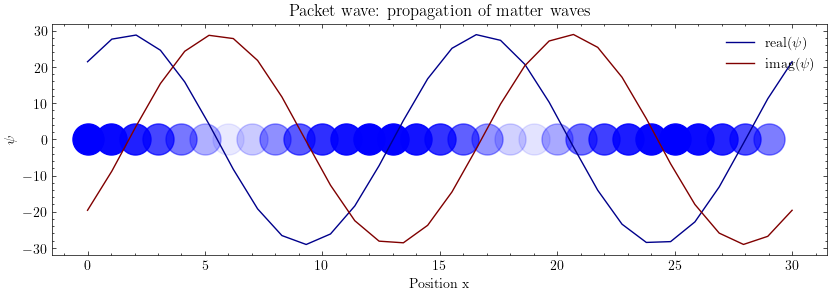

In [13]:
fig, ax = plt.subplots(figsize = (10, 3))
ax.plot(xi, real_t, color = "darkblue", label = r"real($\psi$)")
ax.plot(xi, imag_t, color = "maroon", label = r"imag($\psi$)")
for i in range(p):
    ax.scatter(i, 0, c = "blue", alpha = psi_abs[i] / 30., s = 500.)
ax.set_xlabel("Position x")
ax.set_ylabel(r"$\psi$")
plt.legend()
plt.title("Packet wave: propagation of matter waves")
plt.legend()
plt.show()

### Superpositions

### Fourier decomposition

### Wave packets

### Gaussian wave packets